# PySpark

![](https://luminousmen.com/media/spark-tips.jpg)

PySpark is a Python API for Spark released by the Apache Spark community to support Python with Spark. Using PySpark, one can easily integrate and work with RDDs in Python programming language too. There are numerous features that make PySpark such an amazing framework when it comes to working with huge datasets. Whether it is to perform computations on large datasets or to just analyze them, Data Engineers are switching to this tool.

### Key Features of PySpark

##### 1. Real-time computations: 
  Because of the in-memory processing in the PySpark framework, it shows low latency.

##### 2. Polyglot: 
  The PySpark framework is compatible with various languages such as Scala, Java, Python, and R, which makes it one of the most preferable frameworks for processing huge datasets.

##### 3. Caching and disk persistence: 
  This framework provides powerful caching and great disk persistence.

##### 4. Fast processing: 
  The PySpark framework is way faster than other traditional frameworks for Big Data processing.

##### 5. Works well with RDDs: 
  Python programming language is dynamically typed, which helps when working with RDDs.


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 53.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=a145d9f12fb869136bb3c50ff4368930b9084375bee065d0831e8485a396f634
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf

#Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)

# Supervised Learning

![](https://www.livewireindia.com/blog/wp-content/uploads/2019/06/Supervised-ML-1.gif)

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. 

## Classification

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2020/05/Cats-Dogs-Classification-deep-learning.gif)

Classification is a type of supervised learning. It specifies the class to which data elements belong to and is best used when the output has finite and discrete values. It predicts a class for an input variable as well.

There are 2 types of Classification: 

1. Binomial
2. Multi-Class

### Classification: Use Cases

Some of the key areas where classification cases are being used:

1. To find whether an email received is a spam or ham
2. To identify customer segments
3. To find if a bank loan is granted
4. To identify if a kid will pass or fail in an examination

`Execute the cell in the notebook to load the classes.`

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cd /content/drive/MyDrive/sparkML/Day3

/content/drive/MyDrive/sparkML/Day3


In [ ]:
from pyspark.sql import SQLContext
from pyspark.sql import DataFrameNaFunctions

from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier

from pyspark.ml.feature import Binarizer
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer

## Read Data

In [ ]:
sqlContext = SQLContext(sc)
df = sqlContext.read.load('/content/daily_weather.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
df.show(10)

+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
| air_pressure_9am|      air_temp_9am|avg_wind_direction_9am|avg_wind_speed_9am|max_wind_direction_9am|max_wind_speed_9am|rain_accumulation_9am|rain_duration_9am|relative_humidity_9am|relative_humidity_3pm|
+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|918.0600000000087| 74.82200000000041|                 271.1| 2.080354199999768|    295.39999999999986| 2.863283199999908|                  0.0|              0.0|    42.42000000000046|   36.160000000000494|
|917.3476881177097| 71.40384263106537|    101.93517935618371|2.4430092157340217|    140.47154847112498|3.5333236016106238|                  0.0|              0.0|   24.3286

`Now, print the columns in DataFrame.`

In [ ]:
print(df.columns)

['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am', 'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am', 'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am', 'relative_humidity_3pm']


`Execute the next cell, which defines the columns in the weather data we will use for the decision tree classifier.`

In [ ]:
featureColumns = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

## Data Cleaning

1. Drop unused and missing data. We do not need the number column in our data, so let's remove it from the DataFrame.

2. Next, let's remove all rows with missing data:

In [ ]:
df = df.drop('number')
df = df.na.drop()

`Now , Let us print shape of dataframe.`

In [ ]:
print(df.count(),",",len(df.columns))

1064 , 10


Create categorical variable. Let's create a categorical variable to denote if the humidity is not low. If the value is less than 25%, then we want the categorical value to be 0, otherwise the categorical value should be 1. We can create this categorical variable as a column in a DataFrame using Binarizer:

The threshold argument specifies the threshold value for the variable, inputCol is the input column to read, and outputCol is the name of the new categorical column. The second line applies the Binarizer and creates a new DataFrame with the categorical column.

In [ ]:
binarizer = Binarizer(threshold=24.99999,
                     inputCol = "relative_humidity_3pm",
                     outputCol = "label")

binarizedDF = binarizer.transform(df)

`We can look at the first four values in the new DataFrame. The first row's humidity value is greater than 25% and the label is 1. The other humidity values are less than 25% and have labels equal to 0.`

In [ ]:
binarizedDF.select('relative_humidity_3pm','label').show(5)

+---------------------+-----+
|relative_humidity_3pm|label|
+---------------------+-----+
|   36.160000000000494|  1.0|
|     19.4265967985621|  0.0|
|   14.460000000000045|  0.0|
|   12.742547353761848|  0.0|
|    76.74000000000046|  1.0|
+---------------------+-----+
only showing top 5 rows



`We can also look at data using Pandas Interface.`

In [ ]:
binarizedDF.toPandas().head(2)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0.0


Let's aggregate the features we will use to make predictions into a single column: The inputCols argument specifies our list of column names we defined earlier, and outputCol is the name of the new column. The second line creates a new DataFrame with the aggregated features in a column.

In [ ]:
assembler = VectorAssembler(inputCols=featureColumns,
                           outputCol = 'features')

assembled = assembler.transform(binarizedDF)

In [ ]:
assembled.select('features').show(2)

+--------------------+
|            features|
+--------------------+
|[918.060000000008...|
|[917.347688117709...|
+--------------------+
only showing top 2 rows



## Data Preprocessing

Split training and test data. We can split the data by calling randomSplit():The first argument is how many parts to split the data into and the approximate size of each. This specifies two sets of 80% and 20%. Normally, the seed should not be specified, but we use a specific value here so that everyone will get the same decision tree.

`We can print the number of rows in each DataFrame to check the sizes (1095 * 80% = 851.2).`

In [ ]:
(trainingData, testData) = assembled.randomSplit([0.8,0.2], seed=1234)

In [ ]:
trainingData.count(),testData.count()

(846, 218)

## Decision Tree Classifier

![](https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc)

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.

The labelCol argument is the column we are trying to predict, featuresCol specifies the aggregated features column, maxDepth is stopping criterion for tree induction based on maximum depth of tree, minInstancesPerNode is stopping criterion for tree induction based on minimum number of samples in a node, and impurity is the impurity measure used to split nodes.

`We can create a model by training the decision tree. This is done by executing it in a Pipeline.`

In [ ]:
dt = DecisionTreeClassifier(labelCol='label',featuresCol='features',maxDepth=5,
                           minInstancesPerNode = 20, impurity = 'gini')

In [ ]:
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(trainingData)

`Let's make predictions using our test data set.`

In [ ]:
predictions = model.transform(testData)

In [ ]:
predictions.select('prediction','label').show(5)

+----------+-----+
|prediction|label|
+----------+-----+
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
+----------+-----+
only showing top 5 rows



Save predictions to CSV. Finally, let's save the predictions to a CSV file. In the next Spark hands-on activity, we will evaluate the accuracy.

`Let's save only the prediction and label columns to a CSV file.`

In [ ]:
predictions.select('prediction','label').write.save('low_humidity_prediction.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

## Model Evaluation

Model evaluation aims to estimate the generalization accuracy of a model on future (unseen/out-of-sample) data.
Methods for evaluating a model’s performance are divided into 2 categories: namely, holdout and Cross-validation. Both methods use a test set (i.e data not seen by the model) to evaluate model performance. It’s not recommended to use the data we used to build the model to evaluate it. This is because our model will simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. This is known as overfitting.

`Execute the next cell to load the classes.`

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
predictions = sqlContext.read.load('./low_humidity_prediction.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

In [ ]:
predictions.show(5)

+----------+-----+
|prediction|label|
+----------+-----+
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
+----------+-----+
only showing top 5 rows



`Let's create an instance of MulticlassClassificationEvaluator to determine the accuracy of the predictions.`

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',
                                             predictionCol = 'prediction',
                                             metricName = 'accuracy')

The first two arguments specify the names of the label and prediction columns, and the third argument specifies that we want the overall precision.

`We can compute the accuracy by calling evaluate().`

In [ ]:
acc = evaluator.evaluate(predictions)
print(acc)

0.7522935779816514


## Confusion Metrics

The MulticlassMetrics class can be used to generate a confusion matrix of our classifier model. However, unlike MulticlassClassificationEvaluator, MulticlassMetrics works with RDDs of numbers and not DataFrames, so we need to convert our predictions DataFrame into an RDD.

If we use the rdd attribute of predictions, we see this is an RDD of Rows.

In [ ]:
predictions.rdd.take(2)

[Row(prediction=1.0, label=1.0), Row(prediction=1.0, label=1.0)]

Instead, we can map the RDD to tuple to get an RDD of numbers:

In [ ]:
predictions.rdd.map(tuple).take(5)

[(1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]

`Let's create an instance of MulticlassMetrics with this RDD:`

In [ ]:
metrics = MulticlassMetrics(predictions.rdd.map(tuple))

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


`The confusionMatrix() function returns a Spark Matrix, which we can convert to a Python Numpy array, and transpose to view.`

In [ ]:
metrics.confusionMatrix().toArray().T

array([[81., 33.],
       [21., 83.]])

# Unsupervised Learning

![](https://miro.medium.com/max/1280/1*HU617gljScDVnanadMzCcQ.gif)

Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning, also known as self-organization allows for modeling of probability densities over inputs. It forms one of the three main categories of machine learning, along with supervised and reinforcement learning. Semi-supervised learning, a related variant, makes use of supervised and unsupervised techniques.

## KMeans Clustering

![](https://sharpneat.sourceforge.io/research/kmeans_example_animation.gif)

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

## Problem Description

This activity guides you through the process of performing cluster analysis on a dataset using k-means. In this activity, we will perform cluster analysis on the minute-weather.csv dataset using the k-means algorithm. Recall that this dataset contains weather measurements such as temperature, relative humidity, etc., from a weather station in San Diego, California, collected at one-minute intervals. The goal of cluster analysis on this data is to identify different weather patterns for this weather station.

`Execute the next cell to load the classes used in this activity.`

In [ ]:
from pyspark.sql import SQLContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
%matplotlib inline

`I am making this extra codes to make plots. Please feel free to explore.`

In [ ]:
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())
    
    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


def elbow(elbowset, clusters):
    wsseList = []	
    for k in clusters:
        print("Training for cluster size {} ".format(k))
        kmeans = KM(k = k, seed = 1)
        model = kmeans.fit(elbowset)
        transformed = model.transform(elbowset)
        featuresAndPrediction = transformed.select("features", "prediction")

        W = computeCost(featuresAndPrediction, model)
        print("......................WSSE = {} ".format(W))

        wsseList.append(W)
    return wsseList

def elbow_plot(wsseList, clusters):
    wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
    wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data, P):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

`Execute the cell to load the minute weather data in minute_weather.csv.`

In [ ]:
df = sqlContext.read.load('minute_weather.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')

In [ ]:
df.count()

248473

`There are over 1.5 million rows in the DataFrame. Clustering this data on your computer in the Cloudera VM can take a long time, so let's only one-tenth of the data. We can subset by calling filter() and using the rowID column.`

In [ ]:
filteredDF = df.filter((df.rowID % 10 == 0))
filteredDF.count()

24848

`Let's compute the summary statistics using describe().`

In [ ]:
filteredDF.describe().toPandas()

,summary,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,count,24848,24848,24848,24838,24838,24838,24838,24838,24838,24847,24847,24848
1,mean,124235.0,917.949130714747,57.83194140373477,146.60242370561238,2.8695023753925466,149.1830662694259,3.5281302842418834,150.23262742571865,2.1949351799661785,4.398921398964554E-4,0.662454219825331,44.83176513200264
2,stddev,71731.44080527032,3.391340640503805,11.380597609342674,96.55137749383688,2.0781417833501905,92.1516499322866,2.453982446847226,101.67085577167332,1.755556038379565,0.0070259348073800345,5.870616597886605,28.553998215547786
3,min,0,906.4,32.9,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,1.4
4,max,248470,929.5,90.68,359.0,23.4,359.0,24.5,359.0,21.6,0.43,60.0,93.0


`The weather measurements in this dataset were collected during a drought in San Diego. We can count the how many values of rain accumulation and duration are 0.`

In [ ]:
filteredDF.filter(filteredDF.rain_accumulation == 0).count()

24608

In [ ]:
filteredDF.filter(filteredDF.rain_duration == 0).count()

24470

`Since most the values for these columns are 0, let's drop them from the DataFrame to speed up our analyses. We can also drop the hpwren_timestamp column since we do not use it.`

In [ ]:
workingDF = filteredDF.drop('rain_accumulation').drop('rain_duration').drop('hpwren_timestamp')

`Let's drop rows with missing values and count how many rows were dropped.`

In [ ]:
before = workingDF.count()
workingDF = workingDF.na.drop()
after = workingDF.count()
print(before - after)

10


In [ ]:
workingDF.columns

['rowID',
 'air_pressure',
 'air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'min_wind_direction',
 'min_wind_speed',
 'relative_humidity']

Scale the data. Since the features are on different scales (e.g., air pressure values are in the 900’s, while relative humidities range from 0 to 100), they need to be scaled. We will scale them so that each feature will have a value of 0 for the mean, and a value of 1 for the standard deviation.

`First, we will combine the columns into a single vector column. Let's look at the columns in the DataFrame.`

In [ ]:
featuresUsed = ['air_pressure','air_temp','avg_wind_direction','avg_wind_speed','max_wind_direction',
                'max_wind_speed','relative_humidity']
assembler = VectorAssembler(inputCols=featuresUsed,outputCol='features_unscaled')
assembled = assembler.transform(workingDF)

In [ ]:
assembled.show(2)

+-----+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+--------------------+
|rowID|air_pressure|air_temp|avg_wind_direction|avg_wind_speed|max_wind_direction|max_wind_speed|min_wind_direction|min_wind_speed|relative_humidity|   features_unscaled|
+-----+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+--------------------+
|    0|       912.3|   64.76|              97.0|           1.2|             106.0|           1.6|              85.0|           1.0|             60.5|[912.3,64.76,97.0...|
|   10|       912.3|   62.24|             144.0|           1.2|             167.0|           1.8|             115.0|           0.6|             38.5|[912.3,62.24,144....|
+-----+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+--------------

`Next, let's use StandardScaler to scale the data.`

The withMean argument specifies to center the data with the mean before scaling, and withStd specifies to scale the data to the unit standard deviation.

In [ ]:
scaler = StandardScaler(inputCol='features_unscaled',outputCol='features',withMean=True,withStd=True)
scalerModel = scaler.fit(assembled)
scalerData = scalerModel.transform(assembled)

In [ ]:
scalerData.show(2)

+-----+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+--------------------+--------------------+
|rowID|air_pressure|air_temp|avg_wind_direction|avg_wind_speed|max_wind_direction|max_wind_speed|min_wind_direction|min_wind_speed|relative_humidity|   features_unscaled|            features|
+-----+------------+--------+------------------+--------------+------------------+--------------+------------------+--------------+-----------------+--------------------+--------------------+
|    0|       912.3|   64.76|              97.0|           1.2|             106.0|           1.6|              85.0|           1.0|             60.5|[912.3,64.76,97.0...|[-1.6661996751365...|
|   10|       912.3|   62.24|             144.0|           1.2|             167.0|           1.8|             115.0|           0.6|             38.5|[912.3,62.24,144....|[-1.6661996751365...|
+-----+------------+--------+-----------

**Create elbow plot.** The k-means algorithm requires that the value of k, the number of clusters, to be specified. To determine a good value for k, we will use the “elbow” method. This method involves applying k-means, using different values for k, and calculating the within-cluster sum-of-squared error (WSSE). Since this means applying k-means multiple times, this process can be very compute-intensive. To speed up the process, we will use only a subset of the dataset. We will take every third sample from the dataset to create this subset.

In [ ]:
scalerData = scalerData.select("features","rowID")

elbowset = scalerData.filter(scalerData.rowID % 3 == 0).select("features")
elbowset.persist()

DataFrame[features: vector]

The last line calls the persist() method to tell Spark to keep the data in memory (if possible), which will speed up the computations.

`Let's compute the k-means clusters for k = 2 to 30 to create an elbow plot.`

In [ ]:
clusters = range(2,16)

wsseList = elbow(elbowset,clusters)

Training for cluster size 2 
......................WSSE = 17687.029145920107 
Training for cluster size 3 
......................WSSE = 16011.211258190679 
Training for cluster size 4 
......................WSSE = 14223.52616102465 
Training for cluster size 5 
......................WSSE = 13756.00623844711 
Training for cluster size 6 
......................WSSE = 12993.25551259825 
Training for cluster size 7 
......................WSSE = 12504.773614388308 
Training for cluster size 8 
......................WSSE = 12078.839187424095 
Training for cluster size 9 
......................WSSE = 11943.046757572578 
Training for cluster size 10 
......................WSSE = 11548.789172331346 
Training for cluster size 11 
......................WSSE = 10922.024757680632 
Training for cluster size 12 
......................WSSE = 10661.892524911778 
Training for cluster size 13 
......................WSSE = 10418.607945155487 
Training for cluster size 14 
......................WSSE = 1028

The first line creates an array with the numbers 2 through 30, and the second line calls the elbow() function defined in the utils.py library to perform clustering. The first argument to elbow() is the dataset, and the second is the array of values for k. The elbow() function returns an array of the WSSE for each number of clusters.

`Let's plot the results by calling elbow_plot().`

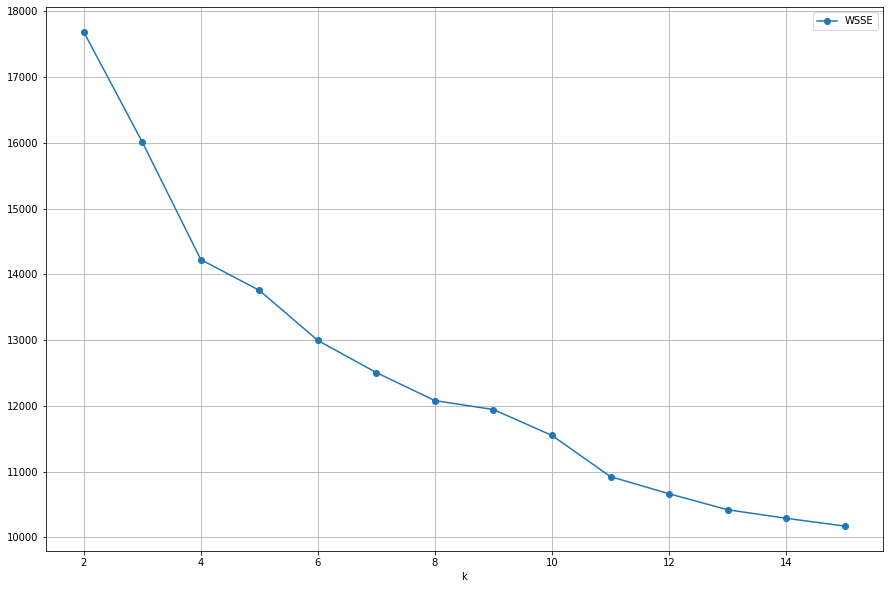

In [ ]:
elbow_plot(wsseList,clusters)

The values for k are plotted against the WSSE values, and the elbow, or bend in the curve, provides a good estimate for the value for k. In this plot, we see that the elbow in the curve is between 10 and 15, so let's choose k = 12. We will use this value to set the number of clusters for k-means.

In [ ]:
scaledDataFeat = scalerData.select('features')
scaledDataFeat.persist()

DataFrame[features: vector]

The first line creates a new KMeans instance with 12 clusters and a specific seed value. (As in previous hands-on activities, we use a specific seed value for reproducible results.) The second line fits the data to the model, and the third applies the model to the data.

`Once the model is created, we can determine the center measurement of each cluster.`

In [ ]:
kmeans = KMeans(k = 12, seed=1)
model = kmeans.fit(scaledDataFeat)

transformed = model.transform(scaledDataFeat)

In [ ]:
centers = model.clusterCenters()
centers

[array([ 0.77135286, -0.30271913, -0.97373623,  2.50401907, -0.90874595,
         2.57694727, -0.90252377]),
 array([-0.1260699 ,  0.80974245,  0.45225271, -0.20277887,  0.60169935,
        -0.23547094, -0.45106671]),
 array([ 0.29460533,  0.57171887,  1.40141509, -0.76640103,  1.6905917 ,
        -0.73575465, -0.62413649]),
 array([ 0.0878572 ,  0.11391611,  2.02221119, -0.69757642, -1.37490865,
        -0.61720215, -0.03324563]),
 array([-0.09037141, -0.88606843,  0.71651179, -0.56377091,  0.92901997,
        -0.55705361,  1.1431109 ]),
 array([ 0.0607432 , -1.03819531, -1.06022215, -0.61295997, -0.89406652,
        -0.61960322,  1.18807885]),
 array([ 0.51828925, -0.05742495, -0.88465573,  1.04437686, -0.81512175,
         1.06807708, -0.76475973]),
 array([-0.95376494, -0.94894335,  0.50430905,  0.50899523,  0.61425607,
         0.49642146,  1.25624898]),
 array([ 1.51917253,  0.2951809 , -0.89384847, -0.37482274, -0.7532293 ,
        -0.3649356 , -0.92231313]),
 array([-1.31135792

`It is difficult to compare the cluster centers by just looking at these numbers. So we will use plots in the next step to visualize them.`

Create parallel plots of clusters and analysis. A parallel coordinates plot is a great way to visualize multi-dimensional data. Each line plots the centroid of a cluster, and all of the features are plotted together. Recall that the feature values were scaled to have mean = 0 and standard deviation = 1. So the values on the y-axis of these parallel coordinates plots show the number of standard deviations from the mean. For example, +1 means one standard deviation higher than the mean of all samples, and -1 means one standard deviation lower than the mean of all samples.

We'll create the plots with matplotlib using a Pandas DataFrame each row contains the cluster center coordinates and cluster label. (Matplotlib can plot Pandas DataFrames, but not Spark DataFrames.) Let's use the pd_centers() function.

In [ ]:
P = pd_centers(featuresUsed,centers)
P.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.771353,-0.302719,-0.973736,2.504019,-0.908746,2.576947,-0.902524,0
1,-0.126070,0.809742,0.452253,-0.202779,0.601699,-0.235471,-0.451067,1
2,0.294605,0.571719,1.401415,-0.766401,1.690592,-0.735755,-0.624136,2
3,0.087857,0.113916,2.022211,-0.697576,-1.374909,-0.617202,-0.033246,3
4,-0.090371,-0.886068,0.716512,-0.563771,0.929020,-0.557054,1.143111,4
